In [3]:
from ultralytics import YOLO
from pathlib import Path

model_path = '/content/best.pt'
model = YOLO(model_path)

print("=" * 70)
print("MODEL LOADED SUCCESSFULLY")
print("=" * 70)
print(f"Model: {model_path}")
print("Ready to test on all datasets!\n")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
MODEL LOADED SUCCESSFULLY
Model: /content/best.pt
Ready to test on all datasets!



In [2]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.1 MB/s eta 0:00:00


In [12]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2

print("📤 Upload your images...")
uploaded = files.upload()

print(f"\n🔄 Processing {len(uploaded)} images...\n")

results_list = []

for filename in uploaded.keys():
    print(f"Testing: {filename}")

    # Run inference
    results = model.predict(source=filename, save=False, conf=0.25)

    # Get annotated image
    annotated = results[0].plot()

    # Count detections
    num_detections = len(results[0].boxes)
    print(f"  ✓ Found {num_detections} objects\n")

    results_list.append({
        'name': filename,
        'image': annotated,
        'count': num_detections
    })

print(f"✅ Done! Total detections: {sum(r['count'] for r in results_list)}")


📤 Upload your images...


Saving Screenshot 2025-10-15 115251.png to Screenshot 2025-10-15 115251.png

🔄 Processing 1 images...

Testing: Screenshot 2025-10-15 115251.png

image 1/1 /content/Screenshot 2025-10-15 115251.png: 320x640 9 class_1s, 456.5ms
Speed: 4.3ms preprocess, 456.5ms inference, 2.8ms postprocess per image at shape (1, 3, 320, 640)
  ✓ Found 9 objects

✅ Done! Total detections: 9


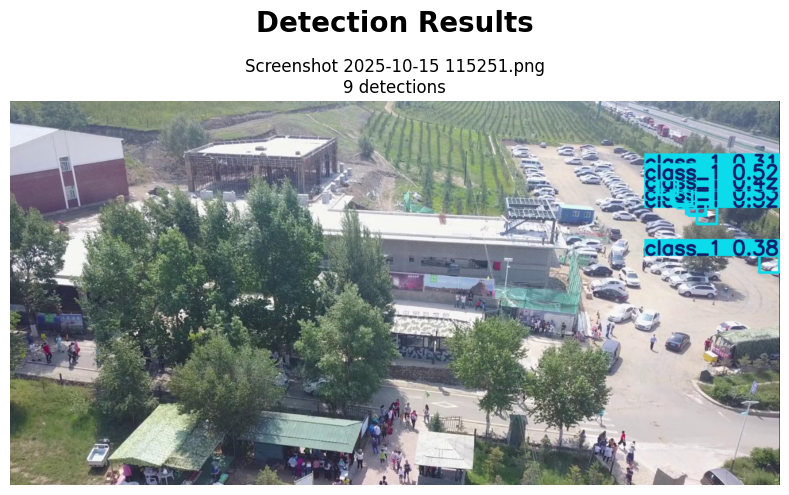


✅ Results saved as 'results.png'


In [13]:
num_images = len(results_list)
cols = min(3, num_images)
rows = (num_images + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))
fig.suptitle('Detection Results', fontsize=20, fontweight='bold')

if num_images == 1:
    axs = [axs]
elif rows == 1:
    axs = axs if num_images > 1 else [axs]
else:
    axs = axs.flatten()

for i, result in enumerate(results_list):
    ax = axs[i] if num_images > 1 else axs[0]
    ax.imshow(cv2.cvtColor(result['image'], cv2.COLOR_BGR2RGB))
    ax.set_title(f"{result['name']}\n{result['count']} detections", fontsize=12)
    ax.axis('off')

# Hide unused subplots
if num_images > 1:
    for i in range(num_images, len(axs)):
        axs[i].axis('off')

plt.tight_layout()
plt.savefig('results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Results saved as 'results.png'")